In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline


# Read File: vmtable.csv and deployment.csv

In [2]:
data_path = 'trace_data/vmtable/vmtable.csv'
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')

deployment_data_path = 'trace_data/deployments/deployments.csv'
deployment_headers=['deploymentid','deploymentsize']
deployment_trace_dataframe = pd.read_csv(deployment_data_path, header=None, index_col=False,names=deployment_headers,delimiter=',')

#Compute VM Lifetime based on VM Created and VM Deleted timestamps and transform to Hour
trace_dataframe['lifetime'] = np.maximum((trace_dataframe['vmdeleted'] - trace_dataframe['vmcreated']),300)/ 3600

#Transform vmcorecount '>24' bucket to 30 and '>64' to 70
max_value_vmcorecountbucket = 30
max_value_vmmemorybucket = 70
trace_dataframe = trace_dataframe.replace({'vmcorecountbucket':'>24'},max_value_vmcorecountbucket)
trace_dataframe = trace_dataframe.replace({'vmmemorybucket':'>64'},max_value_vmmemorybucket)
trace_dataframe = trace_dataframe.astype({"vmcorecountbucket": int, "vmmemorybucket": int})
trace_dataframe['corehour'] = trace_dataframe['lifetime'] * trace_dataframe['vmcorecountbucket']
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime,corehour
0,71fJw0x+SDRdAxKPwLyHZhTgQpYw2afS6tjJhfT6kHnmLH...,GB6uQC1NSArW5n+TtOybL7GQ1yByjuWtZnsj+5QccZ525R...,2sh/ZjaYdfpslv4iYBfNzFe4rs982kHVvNGJGeQ8MIBCDr...,558300,1673700,91.776885,0.728879,20.759630,Delay-insensitive,8,32,309.833333,2478.666667
1,rKggHO/04j31UFy65mDTwtjdMQL/G03xWfl3xGeiilB4/W...,ub4ty8ygwOECrIz7eaZ/9hDwnCsERvZ3nJJ03sDSpD85et...,+ZraIDUNaWYDZMBiBtZm7xSjr+j3zcHGjup1+wyKxHFmyJ...,424500,425400,37.879261,3.325358,37.879261,Unknown,4,32,0.250000,1.000000
2,YrR8gPtBmfNaOdnNEW5If1SdTqQgGQHEnLHGPjySt53bKW...,9LrdYRcUfGbmL2fFfLR/JUg2OTkjGRe3iluwIhDRPnPDPa...,GEyIElfPSFupze8T+T1niQMepeqG88VpLNuxUMyIDbz8VF...,1133100,1133700,0.304368,0.220553,0.304368,Unknown,4,32,0.166667,0.666667
3,xzQ++JF1UAkh70CDhmzkiOo+DQn+E2TLErCFKEmSswv1pl...,0XnZZ8sMN5HY+Yg+0dykYB5oenlgsrCpzpgFSvn/MX42Ze...,7aCQS6fPUw9rwCPiqvghk/WCEbMV3KgNJjA+sssdfY5Ybl...,0,2591400,98.573424,30.340054,98.212503,Interactive,2,4,719.833333,1439.666667
4,vZEivnhabRmImDr+JqKqZnpIM3WxtypwoxjfjnklR/idyR...,HUGaZ+piPP4eHjycCBki2yq0raJywdzrVuriR6nQceH3hA...,/s/D5VtTQDxyS6wq7N/VQAMczx61Ny1Ut3a3iFmDSOCXxp...,228300,229800,82.581449,13.876299,82.581449,Unknown,2,4,0.416667,0.833333


# General Statistics

In [3]:
vm_count = trace_dataframe.shape[0]
subscription_count = trace_dataframe['subscriptionid'].unique().shape[0]
deployment_count = trace_dataframe['deploymentid'].unique().shape[0]
total_vm_hour_available = trace_dataframe['lifetime'].sum()
total_core_hour_available = trace_dataframe['corehour'].sum()

print("Total Number of Virtual Machines in the Dataset: %d" % vm_count)
print("Total Number of Subscriptions in the Dataset: %d" % subscription_count)
print("Total Number of Deployments in the Dataset: %d" % deployment_count)
print("Total VM Hours Available in the Dataset: %f" % total_vm_hour_available)
print("Total Core Hours Available in the Dataset: %f" % total_core_hour_available)

Total Number of Virtual Machines in the Dataset: 2695548
Total Number of Subscriptions in the Dataset: 6687
Total Number of Deployments in the Dataset: 33205
Total VM Hours Available in the Dataset: 162465708.083333
Total Core Hours Available in the Dataset: 469439814.333334


# Read Azure 2019 datasets

In [4]:
lifetime_azure2019 = pd.read_csv('azure2019_data/lifetime.txt', header=0, delimiter='\t')
cpu_azure2019 = pd.read_csv('azure2019_data/cpu.txt', header=0, delimiter='\t')
memory_azure2019 = pd.Series.from_csv('azure2019_data/memory.txt', header=0, sep='\t')
core_azure2019 = pd.Series.from_csv('azure2019_data/cores.txt', header=0, sep='\t')
category_azure2019 = pd.Series.from_csv('azure2019_data/category.txt', header=0, sep='\t')
deployment_azure2019 = pd.read_csv('azure2019_data/deployment.txt', header=0, delimiter='\t')

C:\Users\elicorte\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


# Plot Functions

In [5]:
TraceLegend = "Azure 2019 - Public Dataset V2"
AzureLegend = "Azure 2019"

def CPUPlot(df, azure2019):
    counts_AVG = pd.DataFrame(df.groupby('avgcpu').size().rename('Freq')).reset_index()
    counts_P95 = pd.DataFrame(df.groupby('p95maxcpu').size().rename('Freq')).reset_index()
    counts_AVG = counts_AVG.rename(columns={'avgcpu': 'Bucket'})
    counts_P95 = counts_P95.rename(columns={'p95maxcpu': 'Bucket'})
    counts_AVG['cum'] = counts_AVG['Freq'].cumsum() / counts_AVG['Freq'].sum() * 100
    counts_P95['cum'] = counts_P95['Freq'].cumsum() / counts_P95['Freq'].sum() * 100
    ax = counts_AVG.plot(x='Bucket', y='cum',linestyle='--', color='b', title="VM CPU Utilization",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,20))
    azure2019.plot(x='bucket', y='avg', linestyle='-', color='darkmagenta', logx=False, ax=ax)
    counts_P95.plot(x='Bucket', y='cum', linestyle='--', logx=False, color='b', ax=ax)
    azure2019.plot(x='bucket', y='p95', linestyle='-', logx=False, color='darkmagenta', ax=ax)
    ax.text(9, 85, 'Average', size=11, weight='bold')
    ax.text(50, 45, 'P95 Max',  size=11, weight='bold')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('CPU Utilization (%)')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,100])
    ax.legend([TraceLegend, AzureLegend], loc='best');
    ax.minorticks_off()

    
def LifetimePlot(df, azure2019):
    counts_lifetime = pd.DataFrame(df.groupby('lifetime').size().rename('Freq')).reset_index()
    counts_lifetime = counts_lifetime.rename(columns={'lifetime': 'bucket'})
    counts_lifetime['cum'] = counts_lifetime['Freq'].cumsum() / counts_lifetime['Freq'].sum() * 100
    ax = counts_lifetime[0:2500].plot(x='bucket', y='cum',linestyle='--',  color='b', title="VM Lifetime",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,10))
    azure2019[0:2500].plot(x='bucket', y='value', linestyle='-', color='darkmagenta', logx=False, ax=ax)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Lifetime (Hours)')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,100])
    ax.legend([TraceLegend, AzureLegend], loc='best');
    


def DeploymentPlot(df,azure2019):
    counts_deployment = pd.DataFrame(df.groupby('deploymentsize').size().rename('Freq')).reset_index()
    counts_deployment = counts_deployment.rename(columns={'deploymentsize': 'bucket'})
    counts_deployment.to_csv('deployment.txt', sep='\t', index=False)
    counts_deployment['cum'] = counts_deployment['Freq'].cumsum() / counts_deployment['Freq'].sum() * 100
    ax = counts_deployment[0:50].plot(x='bucket', y='cum',linestyle='--', color='b', title="Deployment Size",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,20))
    azure2019.plot(x='bucket', y='value', linestyle='-', color='darkmagenta', logx=False, ax=ax)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('# VMs')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,50])
    ax.legend([TraceLegend, AzureLegend], loc='best');
    
def MemoryPlot(df, azure2019):
    dataset = (df['vmmemorybucket'].value_counts(normalize=True)*100).sort_index().to_frame().T
    azure2019 = azure2019.to_frame().T
    result = pd.concat([dataset,azure2019], axis=0).fillna(0)
    ax = result.plot.bar(stacked=True, ylim=(0,100), title='VM Memory Distribution', width=0.5, align='center')
    ax.set_xticklabels([TraceLegend, AzureLegend], rotation=0)
    ax.legend(["0-2", "2-4", "4-8", "8-32", '32-64', '>64'], title='Memory Size (GB) Bucket', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3);
    ax.set_ylabel('% of VMs')

def CorePlot(df, azure2019):
    dataset = (df['vmcorecountbucket'].value_counts(normalize=True)*100).sort_index().to_frame().T
    azure2019 = azure2019.to_frame().T
    result = pd.concat([dataset,azure2019], axis=0).fillna(0)
    ax = result.plot.bar(stacked=True, ylim=(0,100), title='VM Cores Distribution', width=0.5, align='center')
    ax.set_xticklabels([TraceLegend, AzureLegend], rotation=0)
    ax.set_ylabel('% of VMs')
    ax.legend(["0-2", "2-4", "4-8", "8-12", '12-24', '>24'],title='Core Count Bucket', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3);
        

def CategoryPlot(df, azure2019):
    dataset = pd.DataFrame(df.groupby('vmcategory')['corehour'].sum().rename('corehour'))
    dataset = dataset.rename(columns={'vmcategory': 'Bucket'})
    dataset['value'] = dataset['corehour']/dataset['corehour'].sum() * 100
    dataset= dataset.drop('corehour', 1)
    dataset = dataset.sort_index().T
    azure2019 = azure2019.to_frame().T
    frames = [dataset, azure2019]
    result = pd.concat(frames)
    ax = result.plot.bar(stacked=True, title='VM Category Distribution', color=['lightskyblue', 'orange', '0.75'], ylim=(0,100))
    ax.set_ylabel('% of core hours')
    ax.set_xticklabels([TraceLegend, AzureLegend], rotation=0)
    ax.legend(["Delay-insensitive", "Interactive", "Unknown"], loc='upper center', title='Categories', bbox_to_anchor=(0.5, -0.10), ncol=3, fontsize=10.5);
    


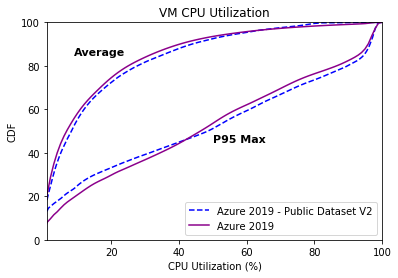

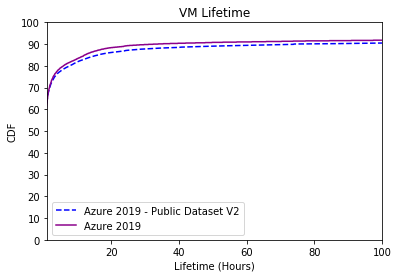

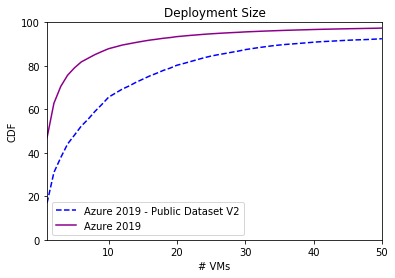

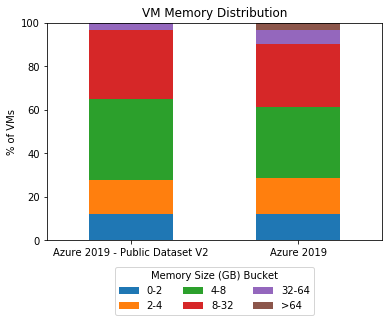

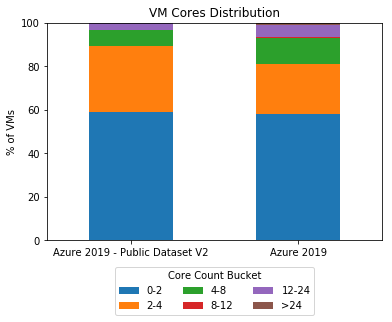

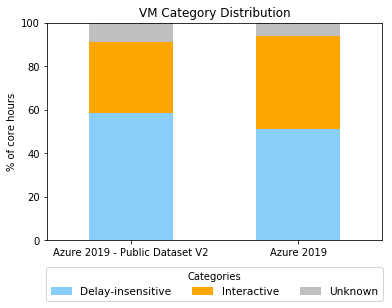

In [6]:
CPUPlot(trace_dataframe, cpu_azure2019)
LifetimePlot(trace_dataframe, lifetime_azure2019)
DeploymentPlot(deployment_trace_dataframe, deployment_azure2019)
MemoryPlot(trace_dataframe, memory_azure2019)
CorePlot(trace_dataframe, core_azure2019)
CategoryPlot(trace_dataframe, category_azure2019)
